### COT Report data scraper

https://github.com/NDelventhal/cot_reports

In [ ]:
pip install cot_reports  

In [ ]:
import pandas as pd
import cot_reports as cot
from matplotlib import pyplot as plt
import numpy as np
import re

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt

### <u> 1. Instructions for using cot_reports </u>


From https://github.com/NDelventhal/cot_reports

#### Example: cot_hist()
df = cot.cot_hist(cot_report_type= 'traders_in_financial_futures_futopt')
#### cot_hist() downloads the historical bulk file for the specified report type, in this example the Traders in Financial Futures Futures-and-Options Combined report. Returns the data as dataframe.

#### Example: cot_year()
df = cot.cot_year(year = 2020, cot_report_type = 'traders_in_financial_futures_fut')
#### cot_year() downloads the single year file of the specified report type and year. Returns the data as dataframe.

#### Example for collecting data of a few years, here from 2017 to 2020, of a specified report:
df = pd.DataFrame()
begin_year = 2017
end_year = 2020
for i in range(begin_year, end_year + 1):
    single_year = pd.DataFrame(cot.cot_year(i, cot_report_type='legacy_futopt')) 
    df = df.append(single_year, ignore_index=True)

#### Example: cot_all()
df = cot.cot_all(cot_report_type='legacy_fut')
#### cot_all() downloads the historical bulk file and all remaining single year files of the specified report type.  Returns the data as dataframe.

### 2. Download and Compile COT Data into a pandas dataframe

In [5]:
#set your own time frame

df = pd.DataFrame()
begin_year = 2019
end_year = 2023
for i in range(begin_year, end_year + 1):
    single_year = pd.DataFrame(cot.cot_year(i, cot_report_type='legacy_futopt')) 
    df = df.append(single_year, ignore_index=True)

Selected: legacy_futopt
Downloaded single year data from: 2019
Selected: legacy_futopt
Downloaded single year data from: 2020
Selected: legacy_futopt
Downloaded single year data from: 2021
Selected: legacy_futopt
Downloaded single year data from: 2022
Selected: legacy_futopt
Downloaded single year data from: 2023


In [6]:
#rename columns to make them easier to call on later

df.rename(columns = {"Market and Exchange Names" : "Market", 
                     "As of Date in Form YYMMDD" : "Datetime", 
                     "Open Interest (All)" : "OI", 
                     "As of Date in Form YYYY-MM-DD" : "Date"}, inplace=True )

In [10]:
#transform datetime format to_datetime
df["Datetime"] = pd.to_datetime(df["Datetime"], format = '%y%m%d')

In [ ]:
#check it worked
df.dtypes

In [ ]:
#explore markets
contracts = df.drop_duplicates(subset = ["Market"])
contracts.reset_index(inplace=True)
contracts["Market"]

### 3. Explore Open Interest for a Commodity Category and Plot Line Graph

In [21]:
#create lists of commodity groups you're interested in and join: example softs
softs = ["cotton","orange","coffee","sugar","cocoa","lumber"]

#alternate code: pattern = '|'.join([f'(?i){softs}' for soft in softs]) #?i is a flag that ignores case
pattern = '|'.join(softs)

In [22]:
softs = df[df["Market"].str.contains(pattern, case=False)]

In [ ]:
#Plot that shows overall OI in softs.
x = "Datetime"
y = "OI"

softs.plot(x,y)
plt.title("Softs Open Interest")
plt.xlabel("Date")
plt.ylabel("Open Interest")


### 4. Explore Open Interest for a Specific Commodity and Plot Line Graph

In [28]:
#find markets including the word sugar, what out for duplication of markets
sugar = df[df["Market"].str.contains("sugar", case=False)]

In [30]:
#check for any mission valuues 
sugar.isnull().sum().sort_values()

Market                                      0
Traders-Total (Other)                       0
Traders-Total Reportable-Short (Old)        0
Traders-Total Reportable-Long (Old)         0
Traders-Commercial-Short (Old)              0
                                           ..
Nonreportable Positions-Long (Other)        0
Total Reportable Positions-Short (Other)    0
Total Reportable Positions-Long (Other)     0
% of OI-Total Reportable-Long (Old)         0
CFTC Commodity Code (Quotes)                0
Length: 129, dtype: int64

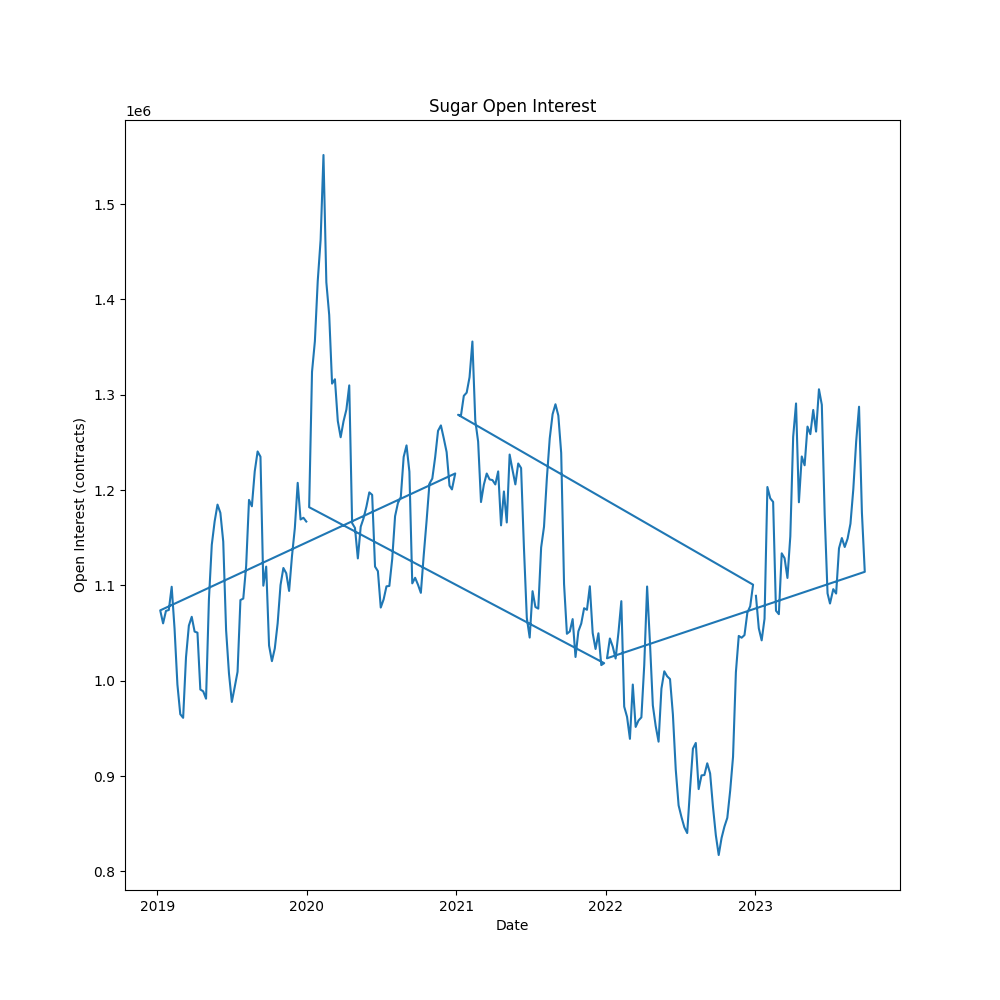

In [32]:
x = sugar["Datetime"]
y = sugar["OI"]

plt.figure(figsize = (10,10))

plt.title("Sugar Open Interest")
plt.xlabel("Date")
plt.ylabel("Open Interest (contracts)")
plt.plot(x,y)

plt.show()


### 5. Create Index Value for a Commodity 

In [35]:
#create new DF for this part of the analysis
df2 = df.sort_values(['Market', 'Datetime'], ascending = [True, True])

In [36]:
#Group markerss and add Open Interest Index Column

group = df2.groupby("Market")["OI"]
df2["OI_Index"] = group.transform(lambda x: (((x - min(x)) / (max(x) - min(x))) * 100))

## Forumla for indexing:
#zi = (xi – min(x)) / (max(x) – min(x)) * 100 = (12 – 12) / (68 – 12) * 100 = 0


In [ ]:
#select a market to check new column
df2[df2["Market"] == "SUGAR NO. 11 - ICE FUTURES U.S."]

In [39]:
sugar = df2[df2["Market"].str.contains("sugar", case=False)]

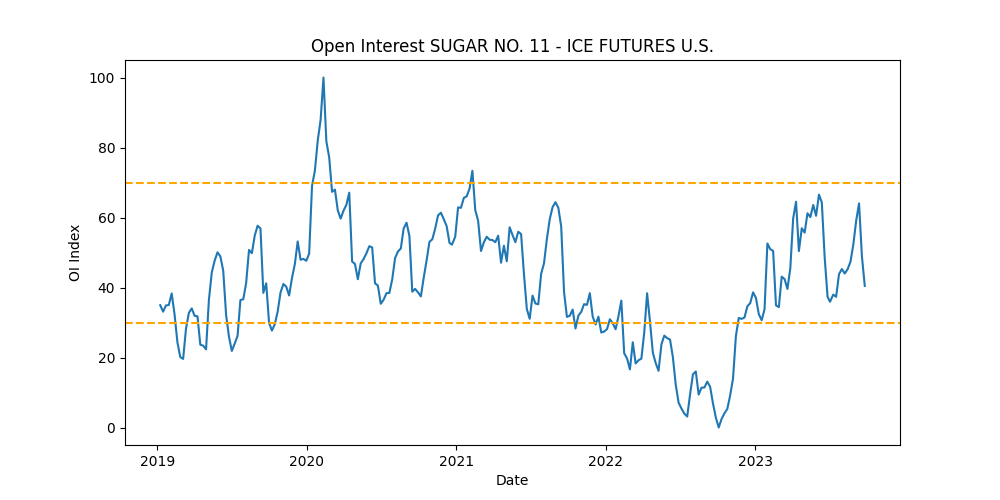

In [41]:
#Create Graph. Dashed lines help view extreme values

x = sugar["Datetime"]
y = sugar["OI_Index"]
market = sugar["Market"]

fig, ax = plt.subplots(figsize =(10,5))
ax.set_title(f'Open Interest {market.iloc[0]}')
ax.set_xlabel("Date")
ax.set_ylabel("OI Index")
ax.plot (x,y)

high_value = 70
low_value = 30
#axhline is horizonal line
ax.axhline(y=high_value, color = 'orange', linestyle = 'dashed')
ax.axhline(y=low_value, color = 'orange', linestyle = 'dashed')


ax.autoscale(axis='y')


plt.show()

### 6. Create Open Interest Indexed Graphs for a list of commodities

In [44]:
softs = ["cotton", "coffee", "sugar", "lumber", "cocoa"]
#note this list will include more than one market where the key word is duplicated, e.g coffee

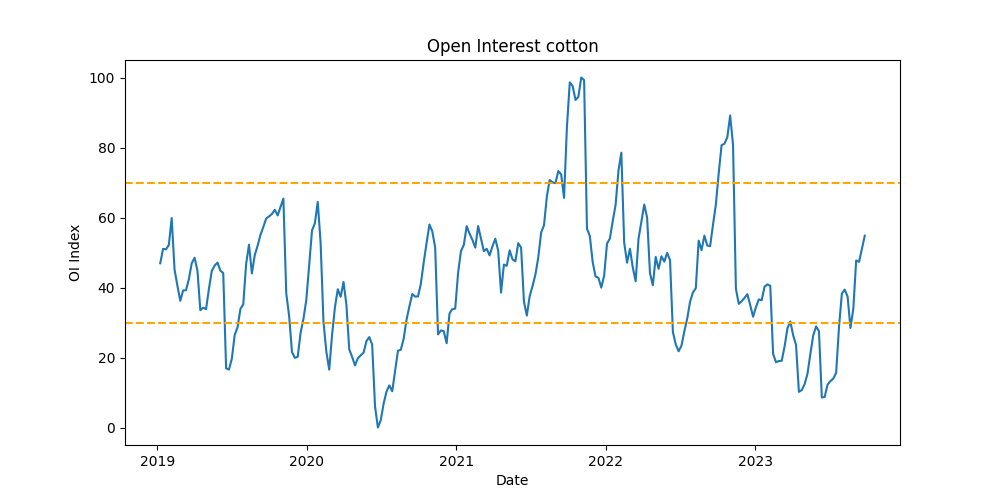

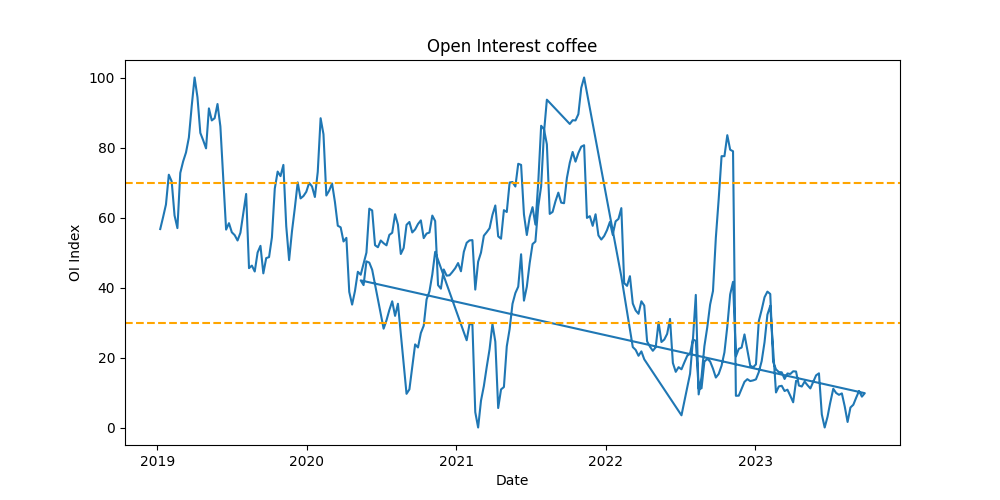

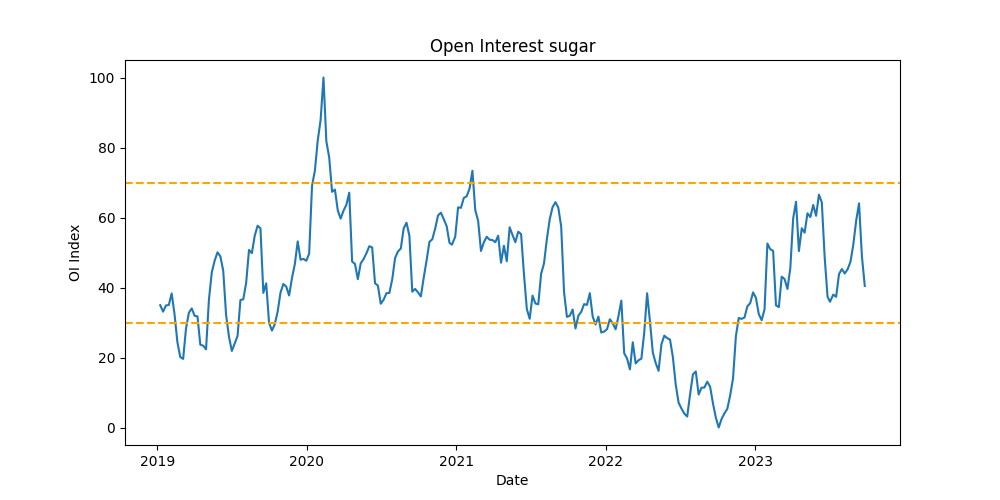

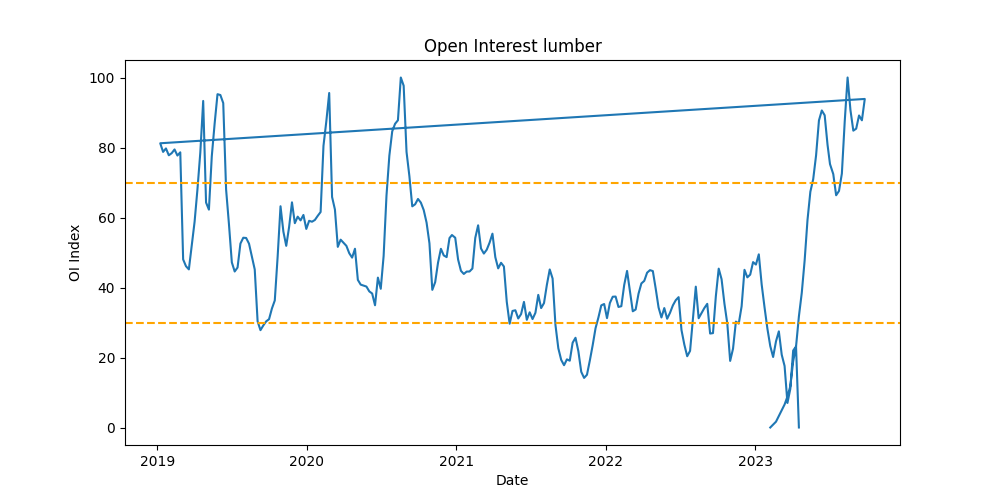

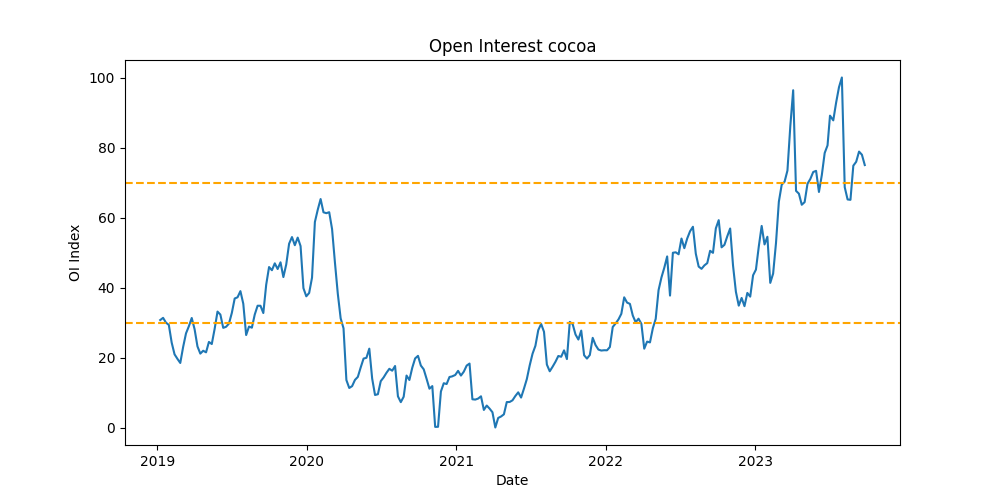

In [43]:
for market_name in softs:
    
    market_data = df2[df2["Market"].str.contains(market_name, case=False)]

    #set the graph
    fig, ax = plt.subplots(figsize =(10,5))
    ax.set_title(f'Open Interest {market_name}')
    ax.set_xlabel("Date")
    ax.set_ylabel("OI Index")
    
    #plot the market
    x = market_data["Datetime"]
    y = market_data["OI_Index"]
    ax.plot (x,y)

    high_value = 70
    low_value = 30
    #axhline is horizonal line
    ax.axhline(y=high_value, color = 'orange', linestyle = 'dashed')
    ax.axhline(y=low_value, color = 'orange', linestyle = 'dashed')

    ax.autoscale(axis='y')

    plt.show()